In [4]:
import numpy as np
import pandas as pd
# import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.metrics import classification_report , confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns


In [5]:
df=pd.read_csv('Epileptic Seizure Recognition.csv')

In [6]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [9]:
df.shape

(11500, 180)

In [10]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [11]:
df.drop('Unnamed',axis=1,inplace=True)

In [12]:
df.shape

(11500, 179)

In [13]:
print(df['y'].value_counts())

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [14]:
df['y']=df['y'].apply(lambda x: 1 if x==1 else 0)

In [15]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [16]:
print(df['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [40]:
# create one random sample for each class
sampley_1=df[df['y']==1].sample(1)
sampley_0=df[df['y']==0].sample(1)

# create the plot
fig=go.Figure()

# add traces for the selected samples
fig.add_trace(go.Scatter(y=sampley_1.iloc[0,1:].values,mode='lines',name='y=1'))
fig.add_trace(go.Scatter(y=sampley_0.iloc[0,1:].values,mode='lines',name='y=0'))

fig.update_layout(title='Visualization of one sample of each class',
                  xaxis_title='Data Points',
                  yaxis_title='EEG values'
)

In [17]:
df1=df.copy()

**Model ANN**

In [18]:
x=df.drop('y',axis=1)
y=df['y']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# Build ann model for binary classification
model = Sequential()

# Input Layer
model.add(Dense(256,input_shape=(X_train.shape[1],),activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Hidden Layers
model.add(Dense(128,activation='elu'))
model.add(Dense(64,activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               45824     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [22]:
# Train the model

# model Checkpoints - Save the best model
model_checkpoint= ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="max",verbose=1)

# Early stopping - stop training if no improvement
early_stopping=EarlyStopping(monitor="val_accuracy",patience=5,verbose=1,mode="max",restore_best_weights=True)

history=model.fit(X_train,y_train,validation_split=0.2 ,epochs=100,batch_size=32,callbacks=[model_checkpoint,early_stopping])

Epoch 1/100
227/230 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.9115
Epoch 1: val_accuracy improved from -inf to 0.95761, saving model to model.keras
230/230 [==============================] - 5s 12ms/step - loss: 0.2697 - accuracy: 0.9117 - val_loss: 0.1372 - val_accuracy: 0.9576
Epoch 2/100
227/230 [============================>.] - ETA: 0s - loss: 0.1648 - accuracy: 0.9481
Epoch 2: val_accuracy did not improve from 0.95761
230/230 [==============================] - 2s 9ms/step - loss: 0.1642 - accuracy: 0.9484 - val_loss: 0.1412 - val_accuracy: 0.9440
Epoch 3/100
223/230 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9536
Epoch 3: val_accuracy did not improve from 0.95761
230/230 [==============================] - 2s 9ms/step - loss: 0.1343 - accuracy: 0.9537 - val_loss: 0.1271 - val_accuracy: 0.9473
Epoch 4/100
225/230 [============================>.] - ETA: 0s - loss: 0.1089 - accuracy: 0.9622
Epoch 4: val_accuracy did not impro

In [23]:
# Evalute the model on training data
train_loss, train_accuracy = model.evaluate(X_train,y_train,verbose=0)

# Evaluate the model on testing data
test_loss, test_accuracy =model.evaluate(X_test,y_test,verbose=0)

print("Train Accuracy :",train_accuracy)
print("\nTest Accuracy :",test_accuracy)
print("\nTrain loss :",train_loss)
print("\nTest loss ",test_loss)

Train Accuracy : 0.9876086711883545

Test Accuracy : 0.9739130139350891

Train loss : 0.03923966363072395

Test loss  0.06998766213655472


In [24]:
# Predict the test data

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

72/72 [==============================] - 1s 5ms/step


In [25]:
print("Classification Report : ",classification_report(y_pred,y_test))

Classification Report :                precision    recall  f1-score   support

           0       0.99      0.97      0.98      1869
           1       0.90      0.97      0.93       431

    accuracy                           0.97      2300
   macro avg       0.95      0.97      0.96      2300
weighted avg       0.98      0.97      0.97      2300



In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n",conf_matrix)

Confusion Matrix : 
 [[1822   13]
 [  47  418]]


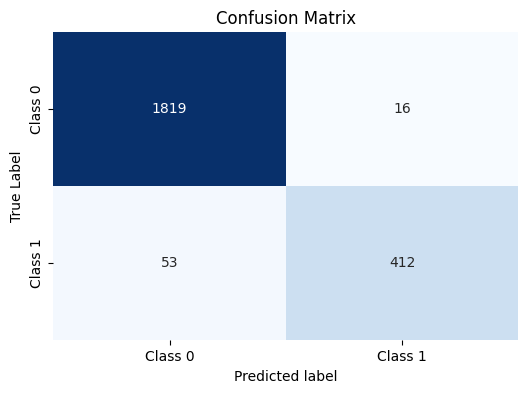

In [68]:
# Visualization of confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'],annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()


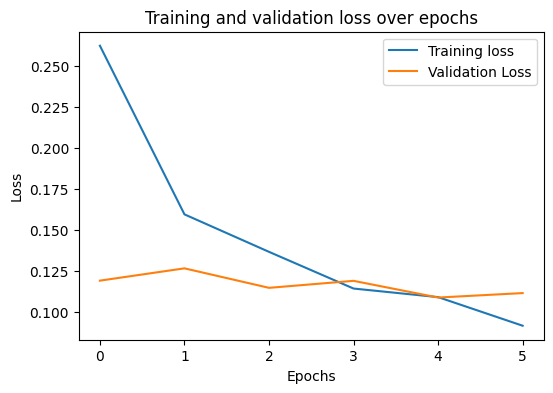

In [74]:
# Visualizing training and validation loss curves

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title('Training and validation loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

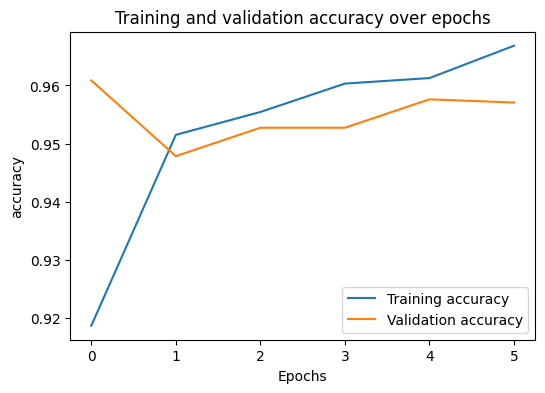

In [75]:
# Visualizing training and validation Accuracy curves

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.title('Training and validation accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
model.save("seizure_detector1.keras",save_format="keras")